In [1]:
import gym
from gym import spaces
from maze_env import Maze
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.common.env_checker import check_env
from stable_baselines.bench import Monitor
from stable_baselines import DQN,A2C

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
TK_SILENCE_DEPRECATION=1

In [3]:
class MazeGym(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self,task):
        self.first = 0
        self.agentXY = [0,0]
        self.goalXY = [4,4]
        walls,pits = self.mazeInfo(task)
        self.env = Maze(self.agentXY, self.goalXY, walls, pits)
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=5,high=395,shape=(4,))
        self.counter = 0
        self.max_steps = 300
    
    def mazeInfo(self, task):
        if task == 0:
            wall_shape=np.array([[2,2],[3,6]])
            pits=np.array([[6,3],[1,4]])
        elif task == 1:
            wall_shape=np.array([[6,2],[5,2],[4,2],[3,2],[2,2],[6,3],[6,4],[6,5],[2,3],[2,4],[2,5]])
            pits=[]
        elif task == 2:
            wall_shape=np.array([[6,3],[6,3],[6,2],[5,2],[4,2],[3,2],[3,3],[3,4],[3,5],[3,6],[4,6],[5,6],[5,7],[7,3]])
            pits=np.array([[1,3],[0,5], [7,7], [8,5]])
        return wall_shape, pits

    def step(self,action):
        self.counter += 1
        s_,r,d = self.env.step(action)
        if (self.counter == self.max_steps):
            self.counter = 0
            d = True
        return np.array(s_),r,d,{}

    def reset(self):
        state = np.array(self.env.reset(value=self.first))
        self.first = 1
        return state

    def render(self,mode='human'):
        self.env.render()

In [4]:
i = 2 # represents which task we will run
env = MazeGym(task=i)
env = Monitor(env=env, filename=None)
model = DQN('MlpPolicy', env, verbose=1) # pick your algorithm from stable baselines
rewards = []







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [5]:
env2 = MazeGym(task=i)
env2 = Monitor(env2, filename=None)
model2 = A2C('MlpPolicy', env2, verbose=1)
rewards2 = []

Wrapping the env in a DummyVecEnv.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
while (len(rewards) < 2000):
    print("Length of Rewards for DQN: {}".format(len(rewards)))
    model.learn(total_timesteps=10000)
    rewards = env.get_episode_rewards()

while (len(rewards2) < 2000):
    print("Length of Rewards for A2C: {}".format(len(rewards2)))
    model2.learn(total_timesteps=10000)
    rewards2 = env2.get_episode_rewards()

Length of Rewards for DQN: 0
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -12.6    |
| steps                   | 3572     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | -10.8    |
| steps                   | 4566     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 300      |
| mean 100 episode reward | -12.1    |
| steps                   | 7508     |
--------------------------------------
Length of Rewards for DQN: 330
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -17.2    |
| steps                   | 9611     |
--------------------------------------
Leng

---------------------------------
| ep_len_mean        | 83.3     |
| ep_reward_mean     | -15.8    |
| explained_variance | 0.571    |
| fps                | 292      |
| nupdates           | 1900     |
| policy_entropy     | 1.35     |
| total_timesteps    | 9500     |
| value_loss         | 6.15e-09 |
---------------------------------
---------------------------------
| ep_len_mean        | 88.8     |
| ep_reward_mean     | -16.2    |
| explained_variance | -183     |
| fps                | 301      |
| nupdates           | 2000     |
| policy_entropy     | 1.17     |
| total_timesteps    | 10000    |
| value_loss         | 0.000231 |
---------------------------------
Length of Rewards for A2C: 128
---------------------------------
| ep_len_mean        | 88.8     |
| ep_reward_mean     | -16.2    |
| explained_variance | -174     |
| fps                | 1013     |
| nupdates           | 1        |
| policy_entropy     | 1.11     |
| total_timesteps    | 5        |
| value_loss     

---------------------------------
| ep_len_mean        | 165      |
| ep_reward_mean     | -21.1    |
| explained_variance | -40.4    |
| fps                | 323      |
| nupdates           | 100      |
| policy_entropy     | 1.34     |
| total_timesteps    | 500      |
| value_loss         | 0.000192 |
---------------------------------
---------------------------------
| ep_len_mean        | 169      |
| ep_reward_mean     | -21.4    |
| explained_variance | -0.00939 |
| fps                | 346      |
| nupdates           | 200      |
| policy_entropy     | 1.32     |
| total_timesteps    | 1000     |
| value_loss         | 96       |
---------------------------------
---------------------------------
| ep_len_mean        | 172      |
| ep_reward_mean     | -21.6    |
| explained_variance | -0.0287  |
| fps                | 413      |
| nupdates           | 300      |
| policy_entropy     | 1.34     |
| total_timesteps    | 1500     |
| value_loss         | 1.38e-06 |
--------------

---------------------------------
| ep_len_mean        | 41.9     |
| ep_reward_mean     | -12.7    |
| explained_variance | -62.6    |
| fps                | 166      |
| nupdates           | 400      |
| policy_entropy     | 1.36     |
| total_timesteps    | 2000     |
| value_loss         | 5.62e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 42.8     |
| ep_reward_mean     | -12.8    |
| explained_variance | -3.2e+07 |
| fps                | 171      |
| nupdates           | 500      |
| policy_entropy     | 1.24     |
| total_timesteps    | 2500     |
| value_loss         | 2.88e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 46.9     |
| ep_reward_mean     | -13      |
| explained_variance | 0.0296   |
| fps                | 183      |
| nupdates           | 600      |
| policy_entropy     | 1.31     |
| total_timesteps    | 3000     |
| value_loss         | 95.4     |
--------------

---------------------------------
| ep_len_mean        | 126      |
| ep_reward_mean     | -18.4    |
| explained_variance | -0.026   |
| fps                | 444      |
| nupdates           | 700      |
| policy_entropy     | 1.3      |
| total_timesteps    | 3500     |
| value_loss         | 94.5     |
---------------------------------
----------------------------------
| ep_len_mean        | 127       |
| ep_reward_mean     | -18.5     |
| explained_variance | -1.74e+03 |
| fps                | 465       |
| nupdates           | 800       |
| policy_entropy     | 1.32      |
| total_timesteps    | 4000      |
| value_loss         | 8.3e-07   |
----------------------------------
---------------------------------
| ep_len_mean        | 132      |
| ep_reward_mean     | -18.8    |
| explained_variance | -8.98    |
| fps                | 483      |
| nupdates           | 900      |
| policy_entropy     | 1.37     |
| total_timesteps    | 4500     |
| value_loss         | 1.29e-05 |
----

---------------------------------
| ep_len_mean        | 222      |
| ep_reward_mean     | -25      |
| explained_variance | -4.35    |
| fps                | 701      |
| nupdates           | 1000     |
| policy_entropy     | 1.18     |
| total_timesteps    | 5000     |
| value_loss         | 7.38e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 222      |
| ep_reward_mean     | -25.1    |
| explained_variance | -0.00538 |
| fps                | 700      |
| nupdates           | 1100     |
| policy_entropy     | 1.35     |
| total_timesteps    | 5500     |
| value_loss         | 94.5     |
---------------------------------
---------------------------------
| ep_len_mean        | 223      |
| ep_reward_mean     | -25.1    |
| explained_variance | -301     |
| fps                | 701      |
| nupdates           | 1200     |
| policy_entropy     | 1.28     |
| total_timesteps    | 6000     |
| value_loss         | 0.000208 |
--------------

---------------------------------
| ep_len_mean        | 244      |
| ep_reward_mean     | -26.5    |
| explained_variance | -0.162   |
| fps                | 724      |
| nupdates           | 1300     |
| policy_entropy     | 1.38     |
| total_timesteps    | 6500     |
| value_loss         | 2.4e-07  |
---------------------------------
---------------------------------
| ep_len_mean        | 246      |
| ep_reward_mean     | -26.7    |
| explained_variance | -26.4    |
| fps                | 722      |
| nupdates           | 1400     |
| policy_entropy     | 1.37     |
| total_timesteps    | 7000     |
| value_loss         | 3.63e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 249      |
| ep_reward_mean     | -26.9    |
| explained_variance | -0.00938 |
| fps                | 715      |
| nupdates           | 1500     |
| policy_entropy     | 1.23     |
| total_timesteps    | 7500     |
| value_loss         | 95.4     |
--------------

---------------------------------
| ep_len_mean        | 285      |
| ep_reward_mean     | -29.3    |
| explained_variance | 0.000282 |
| fps                | 752      |
| nupdates           | 1600     |
| policy_entropy     | 1.33     |
| total_timesteps    | 8000     |
| value_loss         | 94.1     |
---------------------------------
---------------------------------
| ep_len_mean        | 285      |
| ep_reward_mean     | -29.3    |
| explained_variance | 6.56e-06 |
| fps                | 761      |
| nupdates           | 1700     |
| policy_entropy     | 1.36     |
| total_timesteps    | 8500     |
| value_loss         | 3e-06    |
---------------------------------
---------------------------------
| ep_len_mean        | 285      |
| ep_reward_mean     | -29.3    |
| explained_variance | -0.135   |
| fps                | 756      |
| nupdates           | 1800     |
| policy_entropy     | 1.19     |
| total_timesteps    | 9000     |
| value_loss         | 8.57e-06 |
--------------

---------------------------------
| ep_len_mean        | 246      |
| ep_reward_mean     | -26.8    |
| explained_variance | 0.00221  |
| fps                | 587      |
| nupdates           | 1900     |
| policy_entropy     | 1.31     |
| total_timesteps    | 9500     |
| value_loss         | 1.62e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 246      |
| ep_reward_mean     | -26.8    |
| explained_variance | -0.183   |
| fps                | 591      |
| nupdates           | 2000     |
| policy_entropy     | 1.34     |
| total_timesteps    | 10000    |
| value_loss         | 96.8     |
---------------------------------
Length of Rewards for A2C: 568
---------------------------------
| ep_len_mean        | 246      |
| ep_reward_mean     | -26.8    |
| explained_variance | -174     |
| fps                | 1234     |
| nupdates           | 1        |
| policy_entropy     | 1.27     |
| total_timesteps    | 5        |
| value_loss     

---------------------------------
| ep_len_mean        | 33       |
| ep_reward_mean     | -12.2    |
| explained_variance | -0.224   |
| fps                | 118      |
| nupdates           | 100      |
| policy_entropy     | 1.32     |
| total_timesteps    | 500      |
| value_loss         | 94.3     |
---------------------------------
---------------------------------
| ep_len_mean        | 35.6     |
| ep_reward_mean     | -12.3    |
| explained_variance | -1.44    |
| fps                | 186      |
| nupdates           | 200      |
| policy_entropy     | 1.35     |
| total_timesteps    | 1000     |
| value_loss         | 2.75e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 39.7     |
| ep_reward_mean     | -12.5    |
| explained_variance | -3.17    |
| fps                | 217      |
| nupdates           | 300      |
| policy_entropy     | 1.35     |
| total_timesteps    | 1500     |
| value_loss         | 1.25e-05 |
--------------

---------------------------------
| ep_len_mean        | 121      |
| ep_reward_mean     | -18      |
| explained_variance | 2.4e-05  |
| fps                | 633      |
| nupdates           | 400      |
| policy_entropy     | 1.38     |
| total_timesteps    | 2000     |
| value_loss         | 8.65e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 126      |
| ep_reward_mean     | -18.4    |
| explained_variance | 0.0225   |
| fps                | 643      |
| nupdates           | 500      |
| policy_entropy     | 1.2      |
| total_timesteps    | 2500     |
| value_loss         | 96.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 129      |
| ep_reward_mean     | -18.6    |
| explained_variance | -19.5    |
| fps                | 677      |
| nupdates           | 600      |
| policy_entropy     | 1.27     |
| total_timesteps    | 3000     |
| value_loss         | 4.72e-06 |
--------------

---------------------------------
| ep_len_mean        | 210      |
| ep_reward_mean     | -24.2    |
| explained_variance | -3.94    |
| fps                | 604      |
| nupdates           | 700      |
| policy_entropy     | 1.37     |
| total_timesteps    | 3500     |
| value_loss         | 1.03e-09 |
---------------------------------
---------------------------------
| ep_len_mean        | 210      |
| ep_reward_mean     | -24.2    |
| explained_variance | -0.0636  |
| fps                | 613      |
| nupdates           | 800      |
| policy_entropy     | 1.28     |
| total_timesteps    | 4000     |
| value_loss         | 2.42e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 215      |
| ep_reward_mean     | -24.6    |
| explained_variance | 4.31e-05 |
| fps                | 622      |
| nupdates           | 900      |
| policy_entropy     | 1.38     |
| total_timesteps    | 4500     |
| value_loss         | 94.1     |
--------------

---------------------------------
| ep_len_mean        | 180      |
| ep_reward_mean     | -22.2    |
| explained_variance | -0.00172 |
| fps                | 626      |
| nupdates           | 1000     |
| policy_entropy     | 1.32     |
| total_timesteps    | 5000     |
| value_loss         | 93.9     |
---------------------------------
---------------------------------
| ep_len_mean        | 180      |
| ep_reward_mean     | -22.2    |
| explained_variance | -0.069   |
| fps                | 647      |
| nupdates           | 1100     |
| policy_entropy     | 1.31     |
| total_timesteps    | 5500     |
| value_loss         | 1.36e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 180      |
| ep_reward_mean     | -22.2    |
| explained_variance | -176     |
| fps                | 651      |
| nupdates           | 1200     |
| policy_entropy     | 1.19     |
| total_timesteps    | 6000     |
| value_loss         | 0.000435 |
--------------

---------------------------------
| ep_len_mean        | 204      |
| ep_reward_mean     | -23.8    |
| explained_variance | 0.00995  |
| fps                | 754      |
| nupdates           | 1300     |
| policy_entropy     | 1.2      |
| total_timesteps    | 6500     |
| value_loss         | 2.84e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 204      |
| ep_reward_mean     | -23.8    |
| explained_variance | 9.42e-06 |
| fps                | 749      |
| nupdates           | 1400     |
| policy_entropy     | 1.25     |
| total_timesteps    | 7000     |
| value_loss         | 94.5     |
---------------------------------
---------------------------------
| ep_len_mean        | 204      |
| ep_reward_mean     | -23.8    |
| explained_variance | 0.0508   |
| fps                | 760      |
| nupdates           | 1500     |
| policy_entropy     | 1.29     |
| total_timesteps    | 7500     |
| value_loss         | 1.27e-06 |
--------------

---------------------------------
| ep_len_mean        | 275      |
| ep_reward_mean     | -28.7    |
| explained_variance | -2.39    |
| fps                | 719      |
| nupdates           | 1600     |
| policy_entropy     | 1.29     |
| total_timesteps    | 8000     |
| value_loss         | 1.69e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 279      |
| ep_reward_mean     | -28.9    |
| explained_variance | -299     |
| fps                | 717      |
| nupdates           | 1700     |
| policy_entropy     | 1.21     |
| total_timesteps    | 8500     |
| value_loss         | 0.00024  |
---------------------------------
---------------------------------
| ep_len_mean        | 278      |
| ep_reward_mean     | -28.9    |
| explained_variance | 0.0218   |
| fps                | 706      |
| nupdates           | 1800     |
| policy_entropy     | 1.34     |
| total_timesteps    | 9000     |
| value_loss         | 94.4     |
--------------

----------------------------------
| ep_len_mean        | 246       |
| ep_reward_mean     | -26.7     |
| explained_variance | -0.000101 |
| fps                | 585       |
| nupdates           | 1900      |
| policy_entropy     | 1.32      |
| total_timesteps    | 9500      |
| value_loss         | 94.5      |
----------------------------------
---------------------------------
| ep_len_mean        | 246      |
| ep_reward_mean     | -26.7    |
| explained_variance | -0.0155  |
| fps                | 597      |
| nupdates           | 2000     |
| policy_entropy     | 1.33     |
| total_timesteps    | 10000    |
| value_loss         | 1.38e-06 |
---------------------------------
Length of Rewards for A2C: 1059
----------------------------------
| ep_len_mean        | 246       |
| ep_reward_mean     | -26.7     |
| explained_variance | -0.000218 |
| fps                | 993       |
| nupdates           | 1         |
| policy_entropy     | 1.33      |
| total_timesteps    | 5         

---------------------------------
| ep_len_mean        | 198      |
| ep_reward_mean     | -23.4    |
| explained_variance | -727     |
| fps                | 883      |
| nupdates           | 100      |
| policy_entropy     | 1.34     |
| total_timesteps    | 500      |
| value_loss         | 0.000169 |
---------------------------------
---------------------------------
| ep_len_mean        | 192      |
| ep_reward_mean     | -23      |
| explained_variance | -49.9    |
| fps                | 571      |
| nupdates           | 200      |
| policy_entropy     | 1.21     |
| total_timesteps    | 1000     |
| value_loss         | 2.52e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 192      |
| ep_reward_mean     | -23      |
| explained_variance | -0.0337  |
| fps                | 600      |
| nupdates           | 300      |
| policy_entropy     | 1.22     |
| total_timesteps    | 1500     |
| value_loss         | 95.3     |
--------------

---------------------------------
| ep_len_mean        | 143      |
| ep_reward_mean     | -19.6    |
| explained_variance | 0.000986 |
| fps                | 376      |
| nupdates           | 400      |
| policy_entropy     | 1.3      |
| total_timesteps    | 2000     |
| value_loss         | 92.8     |
---------------------------------
---------------------------------
| ep_len_mean        | 141      |
| ep_reward_mean     | -19.5    |
| explained_variance | -0.0272  |
| fps                | 413      |
| nupdates           | 500      |
| policy_entropy     | 1.35     |
| total_timesteps    | 2500     |
| value_loss         | 2.68e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 141      |
| ep_reward_mean     | -19.5    |
| explained_variance | -0.0683  |
| fps                | 443      |
| nupdates           | 600      |
| policy_entropy     | 1.37     |
| total_timesteps    | 3000     |
| value_loss         | 1.07e-05 |
--------------

---------------------------------
| ep_len_mean        | 151      |
| ep_reward_mean     | -20.2    |
| explained_variance | 0        |
| fps                | 524      |
| nupdates           | 700      |
| policy_entropy     | 1.37     |
| total_timesteps    | 3500     |
| value_loss         | 1.02e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 151      |
| ep_reward_mean     | -20.2    |
| explained_variance | 0.00272  |
| fps                | 463      |
| nupdates           | 800      |
| policy_entropy     | 1.37     |
| total_timesteps    | 4000     |
| value_loss         | 94.2     |
---------------------------------
---------------------------------
| ep_len_mean        | 146      |
| ep_reward_mean     | -19.9    |
| explained_variance | -126     |
| fps                | 417      |
| nupdates           | 900      |
| policy_entropy     | 1.32     |
| total_timesteps    | 4500     |
| value_loss         | 9.4e-06  |
--------------

----------------------------------
| ep_len_mean        | 132       |
| ep_reward_mean     | -18.8     |
| explained_variance | -1.76e+04 |
| fps                | 517       |
| nupdates           | 1000      |
| policy_entropy     | 1.3       |
| total_timesteps    | 5000      |
| value_loss         | 4.93e-06  |
----------------------------------
----------------------------------
| ep_len_mean        | 132       |
| ep_reward_mean     | -18.8     |
| explained_variance | -7.27e-06 |
| fps                | 531       |
| nupdates           | 1100      |
| policy_entropy     | 1.22      |
| total_timesteps    | 5500      |
| value_loss         | 3.94e-06  |
----------------------------------
----------------------------------
| ep_len_mean        | 132       |
| ep_reward_mean     | -18.8     |
| explained_variance | -1.79e-06 |
| fps                | 543       |
| nupdates           | 1200      |
| policy_entropy     | 1.22      |
| total_timesteps    | 6000      |
| value_loss        

---------------------------------
| ep_len_mean        | 131      |
| ep_reward_mean     | -18.8    |
| explained_variance | -0.00127 |
| fps                | 390      |
| nupdates           | 1300     |
| policy_entropy     | 1.33     |
| total_timesteps    | 6500     |
| value_loss         | 94.2     |
---------------------------------
---------------------------------
| ep_len_mean        | 132      |
| ep_reward_mean     | -18.8    |
| explained_variance | -211     |
| fps                | 403      |
| nupdates           | 1400     |
| policy_entropy     | 1.27     |
| total_timesteps    | 7000     |
| value_loss         | 0.000112 |
---------------------------------
---------------------------------
| ep_len_mean        | 137      |
| ep_reward_mean     | -19.1    |
| explained_variance | -29      |
| fps                | 410      |
| nupdates           | 1500     |
| policy_entropy     | 1.25     |
| total_timesteps    | 7500     |
| value_loss         | 3.98e-05 |
--------------

---------------------------------
| ep_len_mean        | 165      |
| ep_reward_mean     | -21.2    |
| explained_variance | 7.75e-07 |
| fps                | 697      |
| nupdates           | 1600     |
| policy_entropy     | 1.25     |
| total_timesteps    | 8000     |
| value_loss         | 1.07e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 169      |
| ep_reward_mean     | -21.4    |
| explained_variance | 2.98e-07 |
| fps                | 697      |
| nupdates           | 1700     |
| policy_entropy     | 1.34     |
| total_timesteps    | 8500     |
| value_loss         | 94.4     |
---------------------------------
---------------------------------
| ep_len_mean        | 172      |
| ep_reward_mean     | -21.5    |
| explained_variance | 0.00522  |
| fps                | 708      |
| nupdates           | 1800     |
| policy_entropy     | 1.36     |
| total_timesteps    | 9000     |
| value_loss         | 1.31e-07 |
--------------

---------------------------------
| ep_len_mean        | 243      |
| ep_reward_mean     | -26.5    |
| explained_variance | -0.0661  |
| fps                | 799      |
| nupdates           | 1900     |
| policy_entropy     | 1.37     |
| total_timesteps    | 9500     |
| value_loss         | 3.35e-09 |
---------------------------------
---------------------------------
| ep_len_mean        | 246      |
| ep_reward_mean     | -26.6    |
| explained_variance | -0.501   |
| fps                | 793      |
| nupdates           | 2000     |
| policy_entropy     | 1.29     |
| total_timesteps    | 10000    |
| value_loss         | 0.0382   |
---------------------------------
Length of Rewards for A2C: 1534
---------------------------------
| ep_len_mean        | 246      |
| ep_reward_mean     | -26.6    |
| explained_variance | -113     |
| fps                | 1131     |
| nupdates           | 1        |
| policy_entropy     | 1.16     |
| total_timesteps    | 5        |
| value_loss    

----------------------------------
| ep_len_mean        | 141       |
| ep_reward_mean     | -19.5     |
| explained_variance | -1.74e+04 |
| fps                | 552       |
| nupdates           | 100       |
| policy_entropy     | 1.28      |
| total_timesteps    | 500       |
| value_loss         | 2.66e-05  |
----------------------------------
---------------------------------
| ep_len_mean        | 138      |
| ep_reward_mean     | -19.3    |
| explained_variance | -0.00378 |
| fps                | 552      |
| nupdates           | 200      |
| policy_entropy     | 1.32     |
| total_timesteps    | 1000     |
| value_loss         | 94.1     |
---------------------------------
---------------------------------
| ep_len_mean        | 134      |
| ep_reward_mean     | -19      |
| explained_variance | -88.6    |
| fps                | 547      |
| nupdates           | 300      |
| policy_entropy     | 1.28     |
| total_timesteps    | 1500     |
| value_loss         | 7.34e-06 |
----

---------------------------------
| ep_len_mean        | 165      |
| ep_reward_mean     | -21.1    |
| explained_variance | 0        |
| fps                | 809      |
| nupdates           | 400      |
| policy_entropy     | 1.22     |
| total_timesteps    | 2000     |
| value_loss         | 7.47e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 165      |
| ep_reward_mean     | -21.1    |
| explained_variance | -0.00437 |
| fps                | 784      |
| nupdates           | 500      |
| policy_entropy     | 1.26     |
| total_timesteps    | 2500     |
| value_loss         | 2.83e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 169      |
| ep_reward_mean     | -21.3    |
| explained_variance | 2.98e-07 |
| fps                | 768      |
| nupdates           | 600      |
| policy_entropy     | 1.29     |
| total_timesteps    | 3000     |
| value_loss         | 94.8     |
--------------

---------------------------------
| ep_len_mean        | 238      |
| ep_reward_mean     | -26.1    |
| explained_variance | -0.00652 |
| fps                | 738      |
| nupdates           | 700      |
| policy_entropy     | 1.35     |
| total_timesteps    | 3500     |
| value_loss         | 94.5     |
---------------------------------
---------------------------------
| ep_len_mean        | 240      |
| ep_reward_mean     | -26.3    |
| explained_variance | -0.00165 |
| fps                | 761      |
| nupdates           | 800      |
| policy_entropy     | 1.32     |
| total_timesteps    | 4000     |
| value_loss         | 3.37e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 240      |
| ep_reward_mean     | -26.3    |
| explained_variance | -31.7    |
| fps                | 754      |
| nupdates           | 900      |
| policy_entropy     | 1.3      |
| total_timesteps    | 4500     |
| value_loss         | 2.38e-05 |
--------------

---------------------------------
| ep_len_mean        | 186      |
| ep_reward_mean     | -22.6    |
| explained_variance | -1.68    |
| fps                | 492      |
| nupdates           | 1000     |
| policy_entropy     | 1.26     |
| total_timesteps    | 5000     |
| value_loss         | 4.94e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 183      |
| ep_reward_mean     | -22.4    |
| explained_variance | 0.0038   |
| fps                | 497      |
| nupdates           | 1100     |
| policy_entropy     | 1.24     |
| total_timesteps    | 5500     |
| value_loss         | 95.9     |
---------------------------------
---------------------------------
| ep_len_mean        | 180      |
| ep_reward_mean     | -22.2    |
| explained_variance | -36.1    |
| fps                | 510      |
| nupdates           | 1200     |
| policy_entropy     | 1.32     |
| total_timesteps    | 6000     |
| value_loss         | 1.27e-05 |
--------------

---------------------------------
| ep_len_mean        | 186      |
| ep_reward_mean     | -22.7    |
| explained_variance | 0.0406   |
| fps                | 704      |
| nupdates           | 1300     |
| policy_entropy     | 1.25     |
| total_timesteps    | 6500     |
| value_loss         | 7.6e-08  |
---------------------------------
---------------------------------
| ep_len_mean        | 189      |
| ep_reward_mean     | -22.9    |
| explained_variance | 0.00101  |
| fps                | 702      |
| nupdates           | 1400     |
| policy_entropy     | 1.23     |
| total_timesteps    | 7000     |
| value_loss         | 9.98e-06 |
---------------------------------
----------------------------------
| ep_len_mean        | 192       |
| ep_reward_mean     | -23.1     |
| explained_variance | -3.58e-06 |
| fps                | 702       |
| nupdates           | 1500      |
| policy_entropy     | 1.25      |
| total_timesteps    | 7500      |
| value_loss         | 96.3      |
-----

---------------------------------
| ep_len_mean        | 228      |
| ep_reward_mean     | -25.5    |
| explained_variance | -0.047   |
| fps                | 683      |
| nupdates           | 1600     |
| policy_entropy     | 1.28     |
| total_timesteps    | 8000     |
| value_loss         | 95.4     |
---------------------------------
---------------------------------
| ep_len_mean        | 229      |
| ep_reward_mean     | -25.5    |
| explained_variance | -0.833   |
| fps                | 695      |
| nupdates           | 1700     |
| policy_entropy     | 1.32     |
| total_timesteps    | 8500     |
| value_loss         | 8.08e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 233      |
| ep_reward_mean     | -25.8    |
| explained_variance | -0.0369  |
| fps                | 695      |
| nupdates           | 1800     |
| policy_entropy     | 1.36     |
| total_timesteps    | 9000     |
| value_loss         | 6.85e-07 |
--------------

---------------------------------
| ep_len_mean        | 273      |
| ep_reward_mean     | -28.5    |
| explained_variance | 0        |
| fps                | 763      |
| nupdates           | 1900     |
| policy_entropy     | 1.36     |
| total_timesteps    | 9500     |
| value_loss         | 2.16e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 273      |
| ep_reward_mean     | -28.5    |
| explained_variance | 0.0116   |
| fps                | 758      |
| nupdates           | 2000     |
| policy_entropy     | 1.26     |
| total_timesteps    | 10000    |
| value_loss         | 94.5     |
---------------------------------
Length of Rewards for A2C: 1933
---------------------------------
| ep_len_mean        | 273      |
| ep_reward_mean     | -28.5    |
| explained_variance | -3.18    |
| fps                | 879      |
| nupdates           | 1        |
| policy_entropy     | 1.29     |
| total_timesteps    | 5        |
| value_loss    

----------------------------------
| ep_len_mean        | 288       |
| ep_reward_mean     | -29.6     |
| explained_variance | -9.91e-05 |
| fps                | 686       |
| nupdates           | 100       |
| policy_entropy     | 1.25      |
| total_timesteps    | 500       |
| value_loss         | 95.5      |
----------------------------------
---------------------------------
| ep_len_mean        | 288      |
| ep_reward_mean     | -29.6    |
| explained_variance | -13.4    |
| fps                | 809      |
| nupdates           | 200      |
| policy_entropy     | 1.3      |
| total_timesteps    | 1000     |
| value_loss         | 9.87e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 285      |
| ep_reward_mean     | -29.4    |
| explained_variance | 1.79e-07 |
| fps                | 698      |
| nupdates           | 300      |
| policy_entropy     | 1.35     |
| total_timesteps    | 1500     |
| value_loss         | 3.34e-06 |
----

In [7]:
rewards = rewards[:2000]
rewards2 = rewards2[:2000]
episodes = len(rewards)

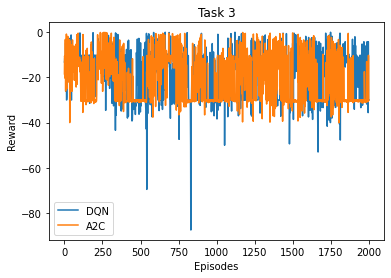

In [8]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Task {}".format(i+1))
plt.plot(list(range(episodes)),rewards, label='DQN')
plt.plot(list(range(episodes)),rewards2, label='A2C')
plt.legend()
plt.savefig("Task 3 A4")

In [9]:
plt.savefig("Task 3 A4")

<Figure size 432x288 with 0 Axes>

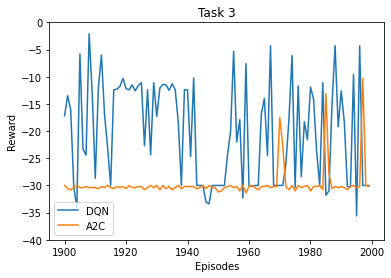

In [14]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Task {}".format(i+1))
plt.plot(list(range(episodes)[1900:]),rewards[1900:], label='DQN')
plt.plot(list(range(episodes)[1900:]),rewards2[1900:], label='A2C')
plt.ylim(bottom=-40,top=0)
plt.legend()
plt.savefig("Task 3 A4 Last 100")

In [11]:
print(max(rewards))
print(max(rewards2))

-0.1
-0.1


In [15]:
print(np.var(rewards[1900:]))
print(np.var(rewards2[1900:]))

82.95277900000102
9.013691000000176
